This notebook is published by Jonathan Delrue

[Linkedin](https://www.linkedin.com/in/jonathandelrue/) / 
[GitHub](https://github.com/jonaudomar)

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

# Linear Regression

🎯 In this exercise, you will model the performance of an NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [2]:
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv"
df = pd.read_csv(url)
df.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define Feature Set and Target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` is the target.

In [3]:
X = df[['mp']]
y = df['win_rating']

👇 In a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), visualize the relationship between the rating and the minutes played.

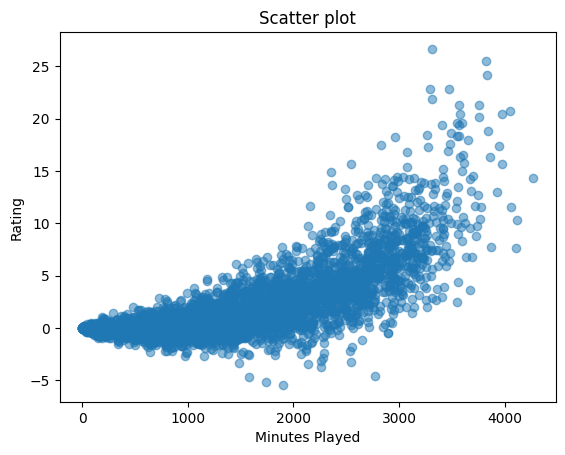

In [4]:
# Plot!
plt.scatter(X, y, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Minutes Played')
plt.ylabel('Rating')
plt.show()

ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Cross-Validation

👇 Using Sklearn's [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html), run a 5-fold cross-validation on a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model predicting the player performance rating from minutes played. Save the raw output of the cross-validation under a new variable called `cv_results`.

In [5]:
# Instantiate model
model = LinearRegression()

# 5-Fold Cross validate the model
cv_results = cross_validate(model, X, y, cv=5)

❓ What is the lowest score of the cross-validation? Compute your answer and save the value under a new variable called `min_score`.

In [6]:
# Min score
min_score = cv_results['test_score'].min()
min_score

0.5344790822272503

❓ What is the highest score of the cross-validation?  Compute your answer and save the value under a new variable called `max_score`.

In [7]:
# Max score
max_score = cv_results['test_score'].max()
max_score

0.5791776193355004

❓ What is the mean score of the cross-validation? Compute your answer and save the value under a new variable called `mean_score`.

In [8]:
# Mean of scores
mean_score = cv_results['test_score'].mean()
mean_score

0.556730180006891

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as `K` increases from 2 to 20.

In [10]:
K = []
total_time = []
score = []

for k in range(2,21):
    cross_val_results = cross_validate(model, X, y, cv=k)

    total_time.append(sum(cross_val_results['fit_time'])+sum(cross_val_results['score_time']))
    K.append(k)
    score.append(cross_val_results['test_score'].mean())

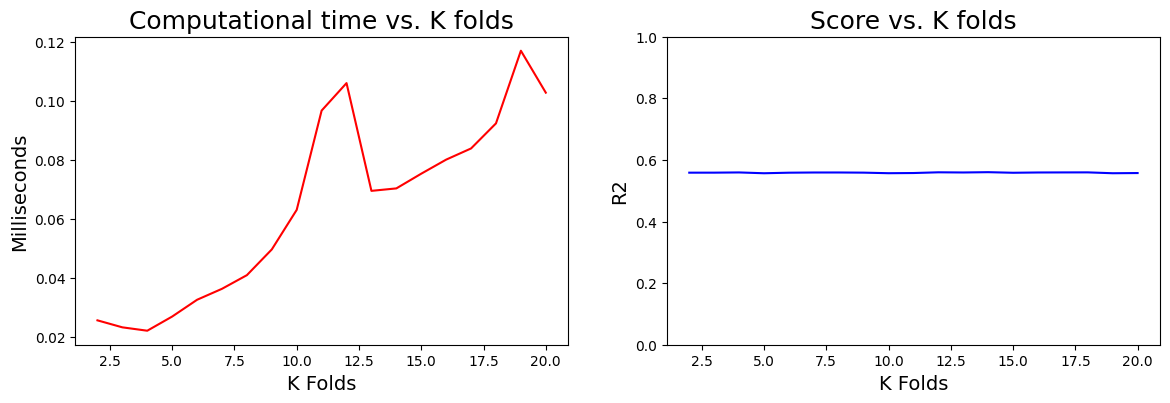

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(K, total_time, color = "red")
plt.xlabel("K Folds", fontsize = 14)
plt.ylabel("Milliseconds", fontsize = 14)
plt.title("Computational time vs. K folds", fontsize = 18)

plt.subplot(1,2,2)
plt.plot(K, score, color = "blue")
plt.xlabel("K Folds", fontsize = 14)
plt.ylabel("R2", fontsize = 14)
plt.ylim(0,1)
plt.title("Score vs. K folds", fontsize = 18);

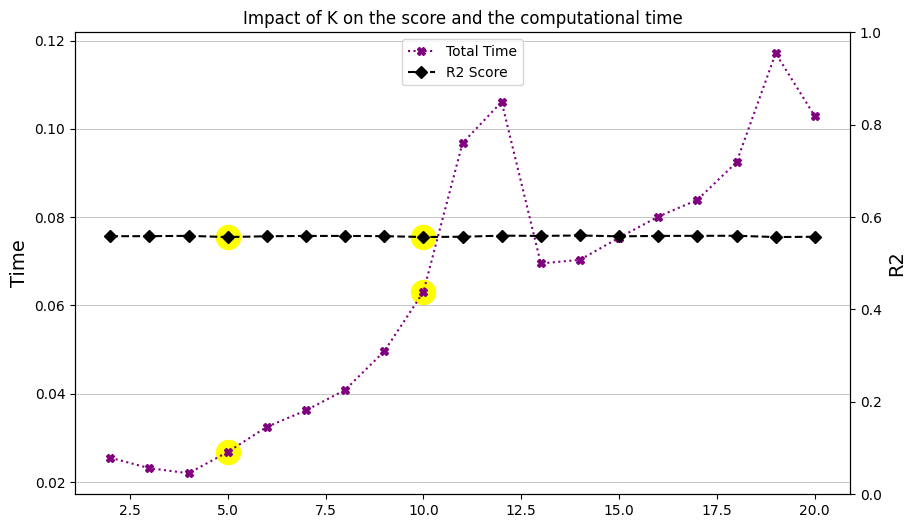

In [12]:
# Plotting like a pro
with plt.style.context('fast'):
    # Setting figsize
    plt.figure(figsize=(10, 6))

    # Getting axes
    ax1 = plt.gca()

    # Duplicating the ax1
    ax2 = ax1.twinx()

    # Plotting time
    ax1.plot(K, total_time, color="purple", linestyle=":", marker="X", label="Total Time")

    # Plotting on the second axis
    ax2.plot(K, score, label="R2 Score", c="black", linestyle = "dashed", marker="D")
    ax2.set_ylim(0, 1)

    # Get a conjoined legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper center')

    # Highlighting results from K = 5 and K = 10
    ax1.scatter(5, total_time[5-2], c='yellow', s=300)
    ax1.scatter(10, total_time[10-2], c='yellow', s=300)
    ax2.scatter(5, score[5-2], c='yellow', s=300)
    ax2.scatter(10, score[10-2], c='yellow', s=300)

    # Additional styling
    ax1.grid(axis="y", linewidth=0.5)
    ax1.set_title('Impact of K on the score and the computational time')
    ax1.set_ylabel('Time', fontsize=14)
    ax2.set_ylabel('R2', fontsize=14)
    plt.show()

ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the Model

Cross-validation is used to evaluate a hypothetical model on the dataset. It trains the chosen model multiple times (the number of folds you chose), each time on another subset of the data, using the rest of the data to calculate the score. This gives us a cross-validated score, telling us how good this model can perform.

If you want to use the model to make predictions, you prefer to train the model on as much data as possible. So, without putting part of the data aside.

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict). Save the trained model under the variable `model`.

In [13]:
# Instantiate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X, y)

LinearRegression()

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under a variable named `slope`.

In [14]:
# Slope
slope = model.coef_[0]
slope

0.002602579938640193

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under a variable named `intercept`.

In [15]:
# Intercept
intercept = model.intercept_
intercept

-1.5463749371639444

🤔 Make sure you understand how to interpret these coefficients before moving on.

## 4. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted value in a variable called `prediction`.

In [16]:
new_datapoint = pd.DataFrame.from_dict({'mp': [1000]})

In [17]:
# Make a prediction with the model
prediction = None

In [18]:
# Make a prediction with the model
prediction = model.predict(new_datapoint)[0]
prediction

1.0562050014762487

## 5. Improving the Model with More Features

Your friend who enjoys the NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio, and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

<Axes: xlabel='pacing', ylabel='win_rating'>

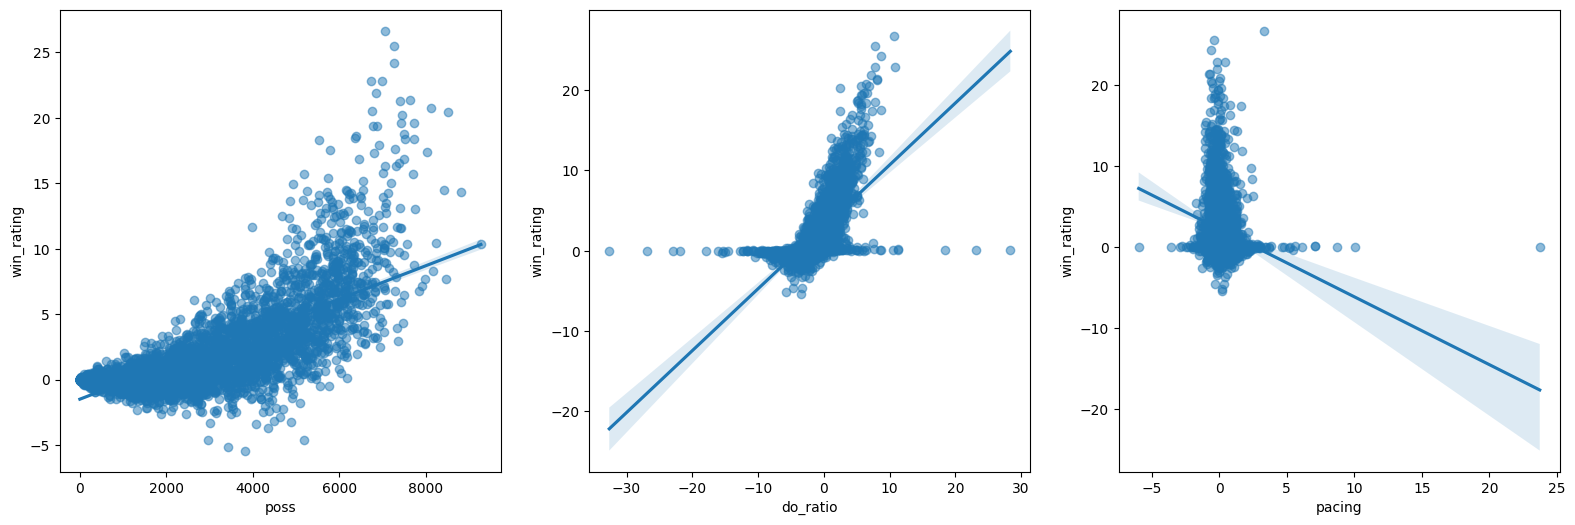

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

plt.subplots_adjust(left=0.5, right=2)

sns.regplot(data=df, y='win_rating', x='poss', ax=axes[0], scatter_kws={'alpha':0.5})
sns.regplot(data=df, y='win_rating', x='do_ratio', ax=axes[1], scatter_kws={'alpha':0.5})
sns.regplot(data=df, y='win_rating', x='pacing', ax=axes[2], scatter_kws={'alpha':0.5})

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [ ]:
X_2_feat = df[['mp', 'do_ratio']]
X_2_feat.head()

,mp,do_ratio
0,2409,-1.546275
1,2708,0.996587
2,2407,0.242598
3,585,-1.343806
4,2056,-1.813990


❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [ ]:
model = LinearRegression()

mean_2_feat_score = cross_val_score(model, X_2_feat, y, cv=5).mean()
mean_2_feat_score

0.6317728310765245

You should see an **increase of around 8%** in your $R^2$ 👏

Congrats, you just performed your first manual *feature selection* - we'll see more ways to do that this week!

🤔 But is this the best we can do with Linear Regression? Let's explore more in the next challenge!

# 🏁